In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
data_file_path = 'heart.csv'
data_df = pd.read_csv(data_file_path)

#To get information on the number of entries and the datatypes of the features
data_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


C:\Users\Dan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


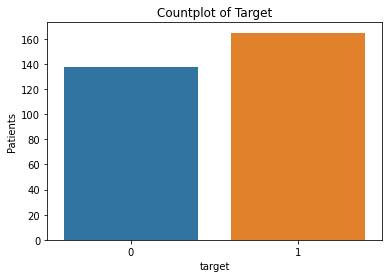

In [3]:
sns.countplot(data_df['target'])

plt.title('Countplot of Target')
plt.xlabel('target')
plt.ylabel('Patients')
plt.show()


In [4]:
y = data_df["target"].values
x = data_df.drop(["target"], axis = 1)

ss = StandardScaler()
x = ss.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [5]:
train_score = []
test_score = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    tr_score = knn.score(X_train, y_train)
    train_score.append(tr_score)
    
    te_score = knn.score(X_test, y_test)
    test_score.append(te_score)


In [6]:
max_test_score = max(test_score)
test_scores_ind = [i for i, v in enumerate(test_score) if v == max_test_score]

'Max test score {} '.format(max_test_score)

'Max test score 0.8791208791208791 '

In [7]:
knn = KNeighborsClassifier(3)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8131868131868132

In [8]:
# Prediction values
# The actual values are:

# The patients who actually don’t have a heart disease = 41
# The patients who actually do have a heart disease = 50

In [9]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,31,9,40
1,8,43,51
All,39,52,91


In [10]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.79      0.78      0.78        40\n           1       0.83      0.84      0.83        51\n\n    accuracy                           0.81        91\n   macro avg       0.81      0.81      0.81        91\nweighted avg       0.81      0.81      0.81        91\n'

In [11]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [12]:
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
roc_auc_score(y_test, y_pred_proba)

0.8647058823529412

In [13]:
# Precision is the ratio between the True Positives and all the Positives.
#  Precision correct around 84% of the time.

In [14]:
# recall is refered to as Sensitivity or True Positive Rate.

In [15]:
# Accuracy is the ratio of the total number of correct predictions and the total number of predictions.
#  Accuracy will be = 0.835.

In [16]:
# F1 = Mean of Precision and Recall

In [17]:
# A receiver operating characteristic curve, or ROC curve, is a graphical plot 
# true positive rate (TPR) against the false positive rate (FPR)

# DET also exists - detection error tradeoff (DET) graph
# which plots the false negative rate (missed detections) vs. the false positive rate (false alarms) 

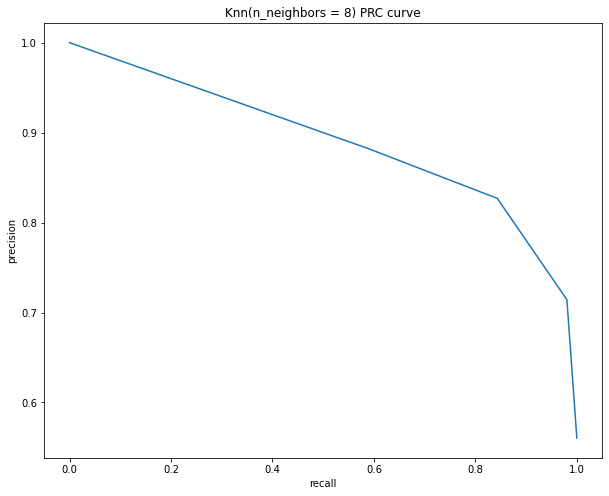

In [20]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize = (10,8))
plt.plot(recall, precision, label = 'Knn')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Knn(n_neighbors = 8) PRC curve')
plt.show()

In [19]:
# Compute Area Under the Curve (AUC) 
auc_prc = auc(recall, precision)
auc_prc

0.8897486596448534